### Project Overview


*Project goal*: this project aims to identify and predict a set of hand-written digits by mapping them onto numeric ones. To do so, it employs two supervised learning models, namely, K-Nearest Neighbors and Logistic Regression. 

*Relevant information*: the data set contains images of hand-written digits: 10 classes where each class refers to a digit. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

*Tools and packages used*: 
- Python
- Pandas
- Matplotlib
- Sklearn
- Jupyter Notebook

*Data (source)*: Scikit-learn library

*Keyword(s)*: K-Nearest Neighbors, Logistic Regression, Data Scaling.   

### Exploratory Data Analysis

In [1]:
# Import necessary modules
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
%matplotlib inline

# Load the digits dataset: digits
digits = load_digits()

# Print all keys and/ properties
print('Properties of the dataset: {}\n'.format(dir(digits)))

# Print the shape of the data key
n_sample, n_feature = digits.data.shape
print(f'Number of observations: {n_sample}, number of features: {n_feature}')

Properties of the dataset: ['DESCR', 'data', 'images', 'target', 'target_names']

Number of observations: 1797, number of features: 64


In [2]:
# Print the 4th sample of the numeric data 
digits.data[3]

array([ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.,  0.,  8., 13.,  6., 15.,
        4.,  0.,  0.,  0.,  2.,  1., 13., 13.,  0.,  0.,  0.,  0.,  0.,
        2., 15., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 12., 12.,  1.,
        0.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  0.,  0.,  0.,  8.,  4.,
        5., 14.,  9.,  0.,  0.,  0.,  7., 13., 13.,  9.,  0.,  0.])

The above array is an 8 x 8 image, in numeric format, represented by a 1D array. 

In [3]:
# Print the target variable
print('This subset of the target variable reveals that this is a multiclass classification problem with ten possible outcomes:\n')
print(digits.target[0:10])

This subset of the target variable reveals that this is a multiclass classification problem with ten possible outcomes:

[0 1 2 3 4 5 6 7 8 9]


##### Image Identification


First three images contained in the data set:


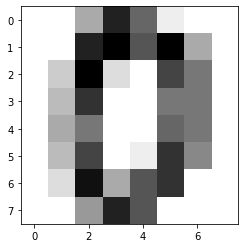

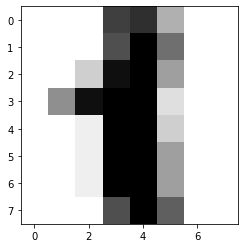

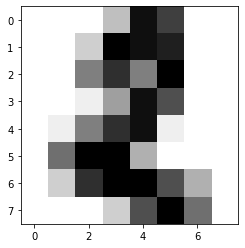

In [4]:
# Visualize some of the images
print('\nFirst three images contained in the data set:')
for i in range(3):
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [5]:
# Identify first 3 digits 
print(f'The first three digits which correspond to the images above are: {digits.target[0:3]}')

The first three digits which correspond to the images above are: [0 1 2]


### Model Building

##### Model 1 - K Neighbors Classifier

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2, random_state=42, stratify=digits.target)

# Create a k-NN classifier with 7 neighbors: knn          
knn = KNeighborsClassifier(n_neighbors = 7)     

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict on the testing set
y_pred = knn.predict(X_test)

##### Evaluating model performance

In [7]:
# Check the performance of the model
print(f'\nK-NN Model Score: {knn.score(X_test, y_test):.4f}\n')
print(classification_report(y_test, y_pred))


K-NN Model Score: 0.9833

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.91      0.93        35
           9       1.00      0.94      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



With a 98% accuracy, the model performed quite well. 

###### Creating some predictions - K-NN Classifier

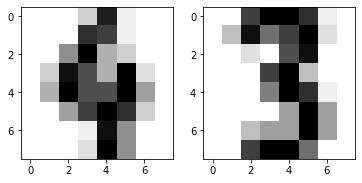

In [8]:
# Pick two random image samples
plt.subplot(1,2,1)
plt.imshow(digits.images[97], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.subplot(1,2,2)
plt.imshow(digits.images[345], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

In [9]:
# Identify the digits displayed above
print(f"The digits displayed above are: {digits.target[97]} and {digits.target[345]} respectively.")

The digits displayed above are: 4 and 3 respectively.


In [10]:
# Using the model to predict samples 97 and 345
print(f'Based on the K-NN model, samples 97 and 345 correspond to the numbers: {knn.predict(digits.data[[97]])} and {knn.predict(digits.data[[345]])} respectively.')

Based on the K-NN model, samples 97 and 345 correspond to the numbers: [4] and [3] respectively.


##### Model 2 - Logistic Regression (with feature scaling)

In [11]:
# scale the training data 
Xs = scale(digits.data)

# Split the data into training and test sets
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, digits.target, test_size = 0.2, random_state=42, stratify=digits.target)

# Instantiate the logisitc classifier: logreg
logreg = LogisticRegression()

# Fit the model
logreg.fit(Xs_train, y_train)

# Predict on the test set
y_pred = logreg.predict(Xs_test)

##### Evaluating model performance

In [12]:
# Check the performance of the model
print(f'Scaled Logistic Regression Score: {logreg.score(Xs_test, y_test):.4f}\n\n')
print(classification_report(y_test, y_pred))

Scaled Logistic Regression Score: 0.9722


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.91      0.89      0.90        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.95      1.00      0.97        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      0.97      0.99        36
           8       0.89      0.91      0.90        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



###### Making some predictions - Logistic Regression Classifier

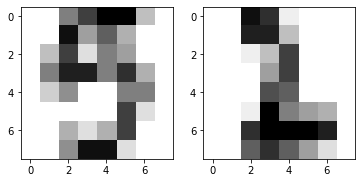

In [13]:
# Pick two random image samples
plt.subplot(1,2,1)
plt.imshow(digits.images[551], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.subplot(1,2,2)
plt.imshow(digits.images[1783], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

In [14]:
# Identify the numbers displayed above
print(f"The digits displayed above are: {digits.target[551]} and {digits.target[1783]} respectively.")

The digits displayed above are: 5 and 2 respectively.


In [15]:
# Using the model to predict the digits display
print(f'Based on the Logistic Regression model, samples 551 and 1783 correspond to numbers: {logreg.predict(digits.data[[551]])} and {logreg.predict(digits.data[[1783]])} respectively.')

Based on the Logistic Regression model, samples 551 and 1783 correspond to numbers: [9] and [2] respectively.
